In [89]:
import xarray as xr
import numpy as np
# import sys
import cmocean.cm as cm
import matplotlib.pyplot as plt

In [90]:
# sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
# import river_202108 as rivers

In [91]:
import salishsea_tools.river_202108 as rivers

In [92]:
jetty_mask = xr.open_dataset('jetty_mask_bathy202108.nc')
jetty_mask

<xarray.Dataset>
Dimensions:     (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
    bfr_coef_u  (y, x) float64 ...
    bfr_coef_v  (y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Jetty Mask for Bathy 202108
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       bathymetry/Process202108Bathymetry.ipynb
    references:   grid/jetty_mask_bathy202108.nc
    history:      [2021-08-06 10:32:12] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [93]:
# jetty_mask.bfr_coef_u.to_numpy().shape
blank = np.zeros((898, 398))

In [94]:
np.argwhere(blank == 0)

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [897, 395],
       [897, 396],
       [897, 397]])

In [95]:
river = xr.open_dataset('/home/sallen/MEOPAR/tools/I_ForcingFiles/Rivers/ncfiles/R202108Dailies_y2017m09d29.nc')
freshwater_bool = river.rorunoff.to_numpy() != 0
freshwater_all = freshwater_bool[0]*11

In [96]:
# order: Salmon, Homathko, Squamish, Cowichan, Nooksack, Elwha, Skagit, Stillaguamish, Nisqually
with_rivers = np.copy(blank)
with_rivers = with_rivers + freshwater_all

# check and add the di dj for each
with_rivers[rivers.prop_dict['evi_n']['SalmonSayward']['i']:rivers.prop_dict['evi_n']['SalmonSayward']['i']+rivers.prop_dict['evi_n']['SalmonSayward']['di'], rivers.prop_dict['evi_n']['SalmonSayward']['j']:rivers.prop_dict['evi_n']['SalmonSayward']['j']+rivers.prop_dict['evi_n']['SalmonSayward']['dj']] = 1
with_rivers[rivers.prop_dict['bute']['Homathko']['i']:rivers.prop_dict['bute']['Homathko']['i']+rivers.prop_dict['bute']['Homathko']['di'], rivers.prop_dict['bute']['Homathko']['j']:rivers.prop_dict['bute']['Homathko']['j']+rivers.prop_dict['bute']['Homathko']['dj']] = 2
with_rivers[rivers.prop_dict['howe']['Squamish']['i']:rivers.prop_dict['howe']['Squamish']['i']+rivers.prop_dict['howe']['Squamish']['di'], rivers.prop_dict['howe']['Squamish']['j']:rivers.prop_dict['howe']['Squamish']['j']+rivers.prop_dict['howe']['Squamish']['dj']] = 3
with_rivers[rivers.prop_dict['evi_s']['Cowichan1']['i']:rivers.prop_dict['evi_s']['Cowichan1']['i']+rivers.prop_dict['evi_s']['Cowichan1']['di'], rivers.prop_dict['evi_s']['Cowichan1']['j']:rivers.prop_dict['evi_s']['Cowichan1']['j']+rivers.prop_dict['evi_s']['Cowichan1']['dj']] = 4
with_rivers[rivers.prop_dict['fraser']['Nooksack']['i']:rivers.prop_dict['fraser']['Nooksack']['i']+rivers.prop_dict['fraser']['Nooksack']['di'], rivers.prop_dict['fraser']['Nooksack']['j']:rivers.prop_dict['fraser']['Nooksack']['j']+rivers.prop_dict['fraser']['Nooksack']['dj']] = 5
with_rivers[rivers.prop_dict['jdf']['Elwha']['i']:rivers.prop_dict['jdf']['Elwha']['i']+rivers.prop_dict['jdf']['Elwha']['di'], rivers.prop_dict['jdf']['Elwha']['j']:rivers.prop_dict['jdf']['Elwha']['j']+rivers.prop_dict['jdf']['Elwha']['dj']] = 6
with_rivers[rivers.prop_dict['skagit']['Skagit1']['i']:rivers.prop_dict['skagit']['Skagit1']['i']+rivers.prop_dict['skagit']['Skagit1']['di'], rivers.prop_dict['skagit']['Skagit1']['j']:rivers.prop_dict['skagit']['Skagit1']['j']+rivers.prop_dict['skagit']['Skagit1']['dj']] = 7
with_rivers[rivers.prop_dict['skagit']['Stillaguamish1']['i']:rivers.prop_dict['skagit']['Stillaguamish1']['i']+rivers.prop_dict['skagit']['Stillaguamish1']['di'], rivers.prop_dict['skagit']['Stillaguamish1']['j']:rivers.prop_dict['skagit']['Stillaguamish1']['j']+rivers.prop_dict['skagit']['Stillaguamish1']['dj']] = 8
with_rivers[rivers.prop_dict['puget']['NisquallyMcAllister']['i']:rivers.prop_dict['puget']['NisquallyMcAllister']['i']+rivers.prop_dict['puget']['NisquallyMcAllister']['di'], rivers.prop_dict['puget']['NisquallyMcAllister']['j']:rivers.prop_dict['puget']['NisquallyMcAllister']['j']+rivers.prop_dict['puget']['NisquallyMcAllister']['dj']] = 9

with_rivers[rivers.prop_dict['fraser']['Fraser']['i']:rivers.prop_dict['fraser']['Fraser']['i']+rivers.prop_dict['fraser']['Fraser']['di'], rivers.prop_dict['fraser']['Fraser']['j']:rivers.prop_dict['fraser']['Fraser']['j']+rivers.prop_dict['fraser']['Fraser']['dj']] = 10

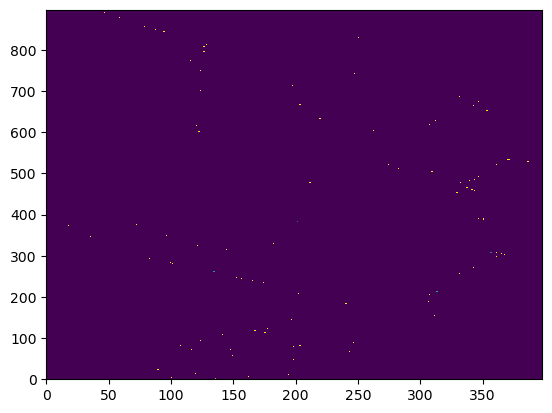

In [97]:
# plt.pcolormesh(with_rivers[891:901, 288:298])
plt.pcolormesh(with_rivers)

In [98]:
# river = xr.open_dataset('/home/sallen/MEOPAR/tools/I_ForcingFiles/Rivers/ncfiles/R202108Dailies_y2017m09d29.nc')
# freshwater_bool = river.rorunoff.to_numpy() != 0
# freshwater_all = freshwater_bool[0]*12
# plt.pcolormesh(freshwater_all)

In [99]:
# data_xr = xr.DataArray(with_rivers, coords={'y': jetty_mask.nav_lat,'x': jetty_mask.nav_lon}, dims=["y", "x"])

In [100]:
jetty_mask

<xarray.Dataset>
Dimensions:     (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables:
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
    bfr_coef_u  (y, x) float64 ...
    bfr_coef_v  (y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Jetty Mask for Bathy 202108
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       bathymetry/Process202108Bathymetry.ipynb
    references:   grid/jetty_mask_bathy202108.nc
    history:      [2021-08-06 10:32:12] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [101]:
data_set=xr.Dataset( coords={'lon': (['x', 'y'], lon),
                    'lat': (['x', 'y'], lat),
                    'time': pd.date_range('2014-09-06', periods=3)})
temp=np.array([[25, 24, 20, -12],[23, 21, 22, -11]])
data_set["Temperature"]=(['x', 'y', 'time'],  temp)

NameError: name 'lon' is not defined

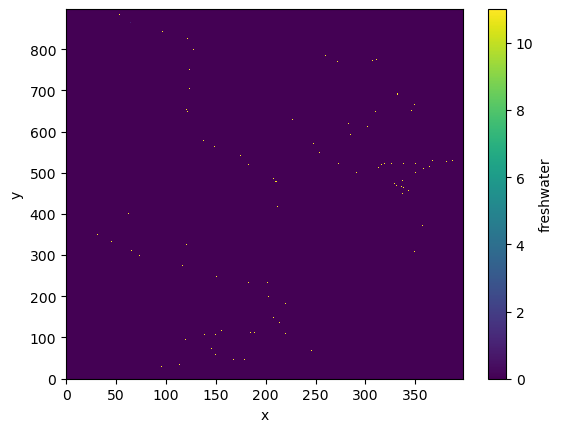

In [ ]:
river_mask = jetty_mask.drop_vars(('bfr_coef_u', 'bfr_coef_v'))
river_mask = river_mask.assign(freshwater=(['y', 'x'], with_rivers))
river_mask['freshwater'].plot()

In [102]:
river_mask.to_netcdf('river_mask_bathy202108.nc')